# <center> Universidad Politécnica de Yucatán </center>
# <center> ![logoupy](https://static.wixstatic.com/media/e16f80_45021b575f1c40cf9102e482464cb4ea~mv2_d_3000_2100_s_2.png/v1/fill/w_560,h_394,al_c,q_85,usm_0.66_1.00_0.01/e16f80_45021b575f1c40cf9102e482464cb4ea~mv2_d_3000_2100_s_2.webp)
## <center> Supervise Learning </center>
<center><h2>Data 7A</h2></center>
<center><h2>Team:</h2></center>
<center><strong>
<li>Adrian Roberto Carmona Rodriguez</li>
<li>Alfredo Alexander Paz Martínez</li>
<li>Pedro Alejandro Uican díaz</li>
<li>Karla Patricia Valdez Echeverria</li>
<li>Emmanuel Alejandro Hurtado Alejandre</li>
</strong></center>


<h3>Introduction</h3>
<p class="texto-justificado">In this notebook we'll see how underfit and overfit looks like with an example.</br>

The simplest model is a linear regression, where the outputs are a linearly weighted combination of the inputs. In this case we are going to use polynomial regression with just one input variable $x$ and one ouptut variable $y$.</p>


In [1]:
# Libraries
from os import system
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

<strong><h3>Model</h3></strong>

The general equation for a polynomial is below.

$$y = \theta_0 + \theta_1 x + \theta_2 x^2 + \theta_3 x^3 \dots + \theta_n x^n + \epsilon$$

Here $y$ represents the **target** and $x$ the **feature**.

The $\theta$ coefficients are the model **parameters** which are to be learned during training and $\epsilon$ is the error present in any model (not to be confused with the error function).

We can consider the degree of the polynomial as an **hyperparameter** that we need to choose.

<strong><h3>Creating Data</h3></strong>

Let's create some syntetic data with the function

$$f(x) = \cos\left(\frac{3}{2}\pi x\right)$$

and add some random noise.

<strong><h4>Resume:</h4></strong>

<i>In this part we make a code to create a sample of data adding some of noise to them. The function was applied to X variable and then we got Y variable, that in this case X variable is clean data without noise, after applying the function, we got the y variable with noise.</i>

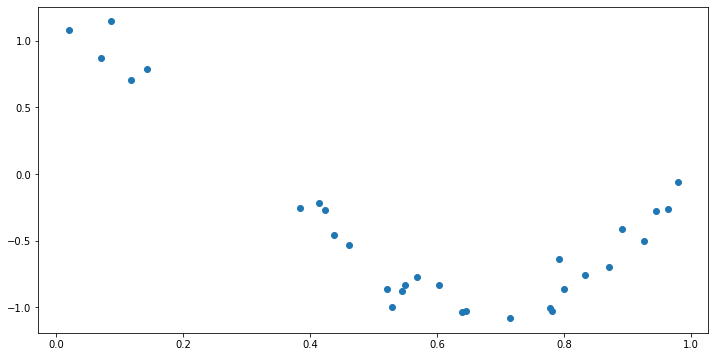

In [2]:
#code to make new data
np.random.seed(0)
f = lambda x: np.cos(1.5 * np.pi * x)
n_samples = 30
x = np.sort(np.random.rand(n_samples))
y = f(x) + np.random.randn(n_samples) * 0.1   # Here y = f(x) + some random noise
plt.figure(figsize=(12, 6));
plt.scatter(x, y);

<strong><h3>Helper functions</h3></strong>

Now let's create some functions to fit a linear regression to the data with a specific degree hyperparameter and plot the results.

In [3]:
def make_linear_regression(x, y, degree):
    polynomial_features = PolynomialFeatures(degree=degree,include_bias=False)
    linear_regression = LinearRegression()
    pipe = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipe.fit(x[:, np.newaxis], y)
    return pipe

def plot_results(f, x, y, pipe, degree):
    x_line = np.linspace(0, 1, 30)   
    plt.figure(figsize=(12, 6))
    plt.scatter(x, y, label="Samples", color="green")
    plt.plot(x_line, pipe.predict(x_line[:, np.newaxis]), label="Model")
    plt.plot(x_line, f(x_line), label="True function")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend()
    plt.title("Degree %d" % degree)

## Model training

We choose a specific degree as hyperparameter and then fit the model to the data plotting the results.

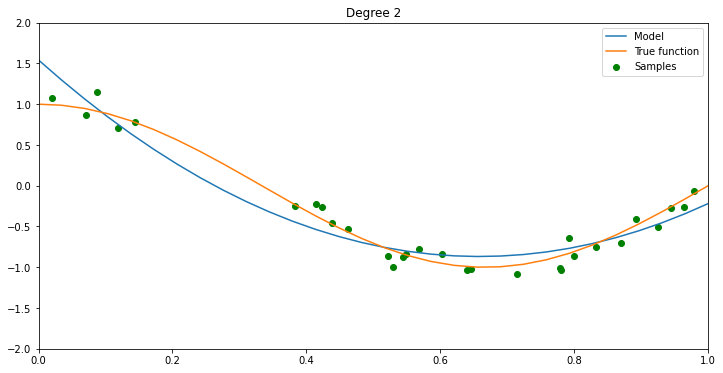

In [4]:
degree = 2
pipe = make_linear_regression(x, y, degree)
plot_results(f, x, y, pipe, degree)

### Learned parameters

The coefficients of the linear regression model are the parameters learned from the data. They are the result of the "best attempt" of the model (given its capacity) to fit to the data provided.

In [5]:
pipe['linear_regression'].intercept_, pipe['linear_regression'].coef_

(1.5411486872392535, array([-7.31956683,  5.55955392]))

In [6]:
pipe['polynomial_features'].get_feature_names_out()

array(['x0', 'x0^2'], dtype=object)

$\hat{y} = 1.54 - 7.31 x + 5.55 x^2$

### Training error

Now compare the true values $y$ with the predicted values $\hat{y}$ predicted by the model using Mean Absolute Error (MAE) as error function.

In [7]:
y_hat = pipe.predict(x[:, np.newaxis])
train_error = mean_absolute_error(y, y_hat)
train_error

0.15088109160456897

## Validate the model with new data

Now, to validate the performance of the model with new data from the same distribution as the training data we generate a new dataset (validation set).

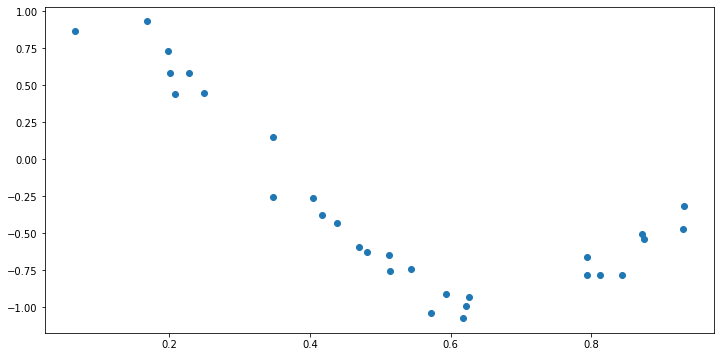

In [8]:
np.random.seed(904)

f = lambda x: np.cos(1.5 * np.pi * x)
n_samples = 30

x_val = np.sort(np.random.rand(n_samples))
y_val = f(x_val) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(12, 6));
plt.scatter(x_val, y_val);

### Predicting the validation data

Lets plot how the model we have fits the new data and measure the error.

In [9]:
y_hat_val = pipe.predict(x_val[:, np.newaxis])
val_error = mean_absolute_error(y_val, y_hat_val)
val_error

0.17114595663617216

<strong><h1>Your task</h1></strong>
<strong>----------------------------------------------------------------------------------------------------------------------<strong><br>
Now you have seen examples of the difference between the error in training data and the error in validation data your task is to iterate on the degree hyperparameter from 1 to 25 fitting the corresponding model to the training data and use it to make predictions with the validation data.

Each team must generate a different validation data changing the value of the random seed as in

```np.random.seed(904)```

but please use the same training data.

* You need to produce a graph with the degree of the polynomial on the x axis and the error measurement on the y axis. The plot should include the training error and the test error measurements to compare its behavior.

* Analyze the graph and report when you see underfit or overfit. Decide which degree you think produced the best model and explain why.

* Finally, generate a new sample of 30 data points (test set), and use your selected model to make predictions on this test set. Report the error measurement on the test set and compare it with the training and validation error for the same model.

<strong><h3>Data generation Function</h3></strong>
<i><p>
    
**Explanation:**

We made a function which generates a new sample of data for our linear model. This function will return a set of clean data using an specific seed to get a random  sambles. In this case number 5 it will get as a default number for the seed 5, but in case that the number were different, it would return a new sample totally different using that number as a seed. In addition is important to mention that "y" variable will return the result of a function with noise.
</p></i>

In [10]:
# Data Generation Function 
def generate_data(num):
    
    np.random.seed(num)

     # Function
    f = lambda x: np.cos(1.5 * np.pi * x)
    n_samples = 30

    # 30 sorted random samles 
    x = np.sort(np.random.rand(n_samples))
    # Adding some Random Noise 
    y = f(x) + np.random.randn(n_samples) * 0.1   # Here y = f(x) + some random noise

    return x,y

# getting training data for the model using 5 as a seed.
x , y = generate_data(10)

# getting validation data for the model using 10 as a seed.
x_val, y_val = generate_data(5)

<strong><h3>Function for returning data used by the models & Function to generate a graph of our results</h3></strong>
<i><p>
    
(**Main Loop Function**)<br>

In this case this function will get the data from X & Y variables with the degree that you want to use to execute the linear regression (1-25 degrees), after executing this one we already prepared a set of lists to save all information for each degree that we use, then all information and Thetas used by the model in each degree will be saved for later.
<br>

In [11]:
# Function to collect all needed data
def Main_Loop(x,y,x_val,y_val,deg):
  
    # Variables Retornables
    Models_list = []
    Train_error_list = []
    Valid_error_list = []
    X_line = []
  
    # Iterating over 1 to 25 degree
    for degree in range(1,deg+1):

        # Training Model
        pipe = make_linear_regression(x,y,degree)
        Models_list.append(pipe)

        # Training Error
        y_hat = pipe.predict(x[:, np.newaxis])
        train_error = mean_absolute_error(y, y_hat)
        Train_error_list.append(train_error)

        # Validation Error
        y_hat_val = pipe.predict(x_val[:, np.newaxis])
        val_error = mean_absolute_error(y_val, y_hat_val)
        Valid_error_list.append(val_error)

        # Degree List
        X_line.append(degree)

    return Models_list, Train_error_list, Valid_error_list, X_line

<br>(**Plot Results Function**)<br>

In this Function we will generate a graph of the true model and the model made by our linear regression to have a really good visualization of our function's behaviour. In this case we have a parameter that will be the degree which will choose what degree you want to visualize.
</p></i>

In [12]:
# Function to Plot Models during Trainig 
def plot_results_training(f, x, y, pipe, degree):
    x_line = np.linspace(0, 1, 30) 
    fig = plt.figure(figsize=(12, 6))
    plt.scatter(x, y, label="Samples", color="green")
    plt.plot(x_line, pipe.predict(x_line[:, np.newaxis]), label="Model")
    plt.plot(x_line, f(x_line), label="True function")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend()
    plt.title("Degree %d" % degree)
    plt.savefig('training_degree_'+"0"+str(degree)+'.svg')
    plt.close(fig)

In [13]:
# Function to Plot Models during Validation 
def plot_results_validation(f, x_val, y_val, pipe, degree):
    x_line = np.linspace(0, 1, 30) 
    fig = plt.figure(figsize=(12, 6))
    plt.scatter(x_val, y_val, label="Samples", color="green")
    plt.plot(x_line, pipe.predict(x_line[:, np.newaxis]), label="Model")
    plt.plot(x_line, f(x_line), label="True function")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend()
    plt.title("Degree %d" % degree)
    plt.savefig('validation_degree_'+"0"+str(degree)+'.svg')
    plt.close(fig)

<i><p>
(**Main Loop Function**)<br>

Here we will call the main function passing the parameters requested before, in this case X, Y and the degree that you want to use as a limit of your loop. (in this case the limit is 25)
</p></i>

In [14]:
# Getting all results of our model
Models_list, Train_error_list, Valid_error_list, X_line = Main_Loop(x,y,x_val,y_val,25)

<strong><h3>(get Polinomial Settings) </h3></strong>
<i><p>
    
This function return the learned parameters of a Model.  
</p></i>

In [15]:
# Function to get coefficients and the instersection of the polynomial
def getPolinomialsettings(Model):

  # Learned  parameters 
    print(Model['linear_regression'].intercept_, Model['linear_regression'].coef_)
    print(Model['polynomial_features'].get_feature_names_out())

### Making all Graphs

Here we use the functions plot_results_training() and plot_results_validation() to save all the graphs of all models, To the use them as a guide to chose visualy the best model. 

In [16]:
#Training Plots
def making_Train_plots(f,x,y,Models_list):
    for degree in range(0,26):
        plot_results_training(f, x, y, Models_list[degree], degree+1)
    print("Training graphs ready!")

In [17]:
#Validation Plots
def making_Valid_plots(f,x_val,y_val,Models_list):
    for degree in range(0,26):
        plot_results_validation(f, x_val, y_val, Models_list[degree], degree+1)
    print("Validation graphs ready!")

In [18]:
#making_Train_plots(f,x,y,Models_list)

In [19]:
#making_Valid_plots(f,x_val,y_val,Models_list)

<strong><h3>Function to get the best model </h3></strong>
<i><p>
    
This function was designed to check what is the best model according to the validation error list. In this case we choose minimum validation error, at the end the fuction will return a tuple with the minimum validation error and the its corresponding position in the list.
</p></i>

In [20]:
# Get best model Function
def getBestModel(Valid_error_list,Train_error_list):
    lower_list = []
    for values in range(0,25):
    
        #Value check for errors
        lower_list.append((Valid_error_list[values],values)) 

    return min(lower_list)

# we call the model and get the result
bestModel = getBestModel(Valid_error_list,Train_error_list)
bestModel

(0.056258249299701676, 5)

In [21]:
# Using the selected bestModel we get the Learned Parameters  
getPolinomialsettings(Models_list[bestModel[1]]) 

1.0652766508680522 [-4.91974841e-02 -2.08725617e+01  6.71337192e+01 -1.44414162e+02
  1.67233945e+02 -7.03673951e+01]
['x0' 'x0^2' 'x0^3' 'x0^4' 'x0^5' 'x0^6']


$\hat{y} = 1.065 - 4.91974841e^{-02} x - 2.08725617e^{+01} x^2 + 6.71337192e^{+01} x^3 - 1.44414162e^{+02} x^4 + 1.67233945e^{+02} x^5 - 7.03673951e^{+01} x^6 $

### Errors Plot 
In this part we show a comparison of the behaviour of the Training Error and Validation Error of each model.   

In [22]:
# Function for Error Plot
def plotErrors(training_error_list,valid_error_list, degree_list):
    plt.figure(figsize=(12, 8))
    plt.xlabel('Polinomial Degree')
    plt.ylabel('Error')
    plt.scatter(degree_list, training_error_list, color="red")
    plt.plot(degree_list, training_error_list, label="Training error")
    plt.scatter(degree_list, valid_error_list, color="green")
    plt.plot(degree_list, valid_error_list, label="Validation error")
    plt.xlim((0, 26))
    plt.ylim((0, 0.6))
    plt.legend()
    plt.title("Training & Validation Errors Comparison Plot")

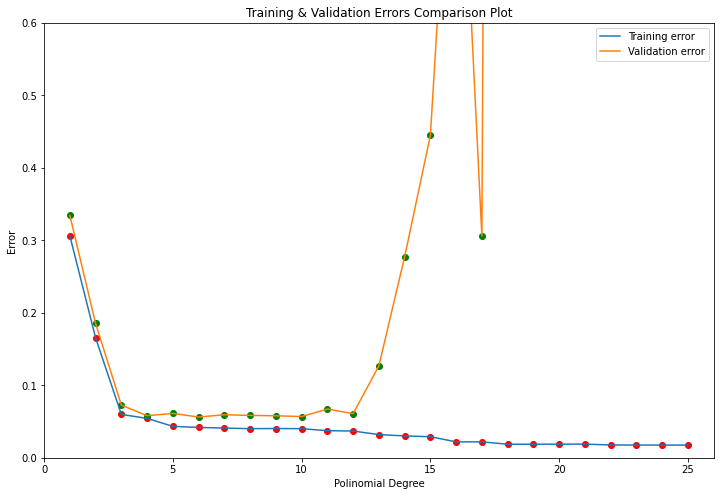

In [23]:
# Show Errors Plot (without normalized data)
plotErrors(Train_error_list,Valid_error_list,X_line)

Figure 1: Errors Plot without normalized data.

### Testing Step

Here we will generate 30 new samples with a different seed, for making the Testing Step with the selected Polinomial Model of Degree 6. After that, we will show you the graph of this model in each of the steps (Training, Validation and Test). 

In [24]:
# Getting test data using 904 as seed.
x_test , y_test = generate_data(904)

Training Step: Model of Degree 6
Training Error =  0.041891058668658075


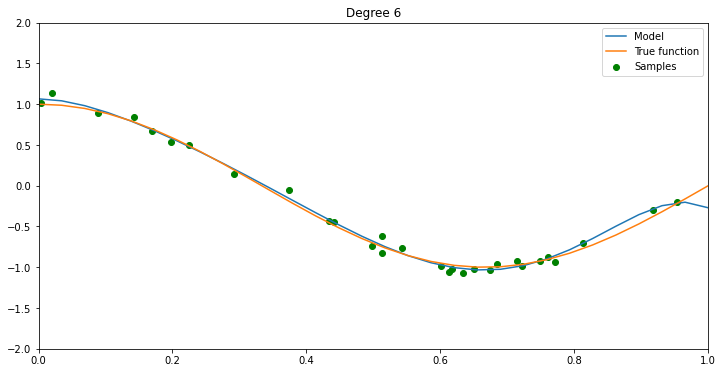

In [25]:
# Show Best Model with Degree 6 (Training Data)
plot_results(f, x, y, Models_list[bestModel[1]], 6)
print("Training Step: Model of Degree 6")
print("Training Error = ",Train_error_list[bestModel[1]])

Figure 2: Best Model during Training Step.

Validation Step: Model of Degree 6
Validation Error =  0.056258249299701676


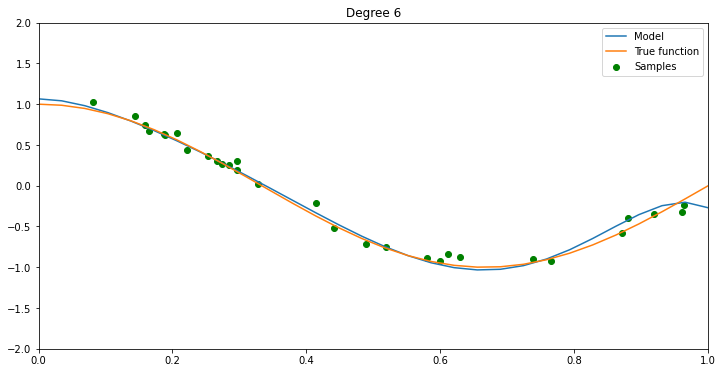

In [26]:
# Show Best Model with Degree 6 (Validation Data)
plot_results(f, x_val, y_val, Models_list[bestModel[1]], 6)
print("Validation Step: Model of Degree 6")
print("Validation Error = ",Valid_error_list[bestModel[1]])

Figure 3: Best Model during Validation Step.

Test Step: Model of Degree 6
Test Error =  0.08982760393251017


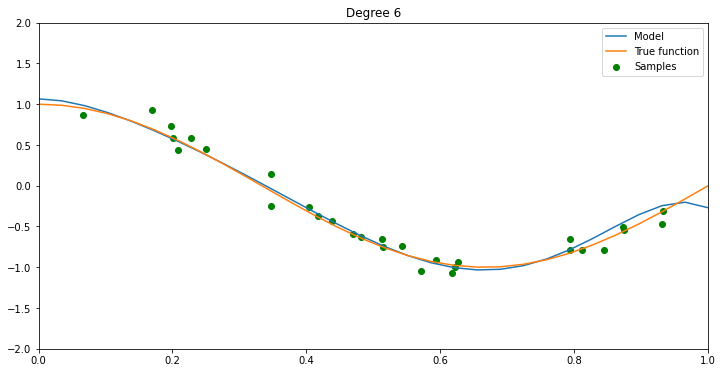

In [27]:
# Show Best Model with Degree 6 (Testing Data)
plot_results(f, x_test, y_test, Models_list[bestModel[1]], 6)
y_hat_test = Models_list[bestModel[1]].predict(x_test[:, np.newaxis])
test_error = mean_absolute_error(y_test, y_hat_test)
print("Test Step: Model of Degree 6")
print("Test Error = ",test_error)

Figure 4: Best Model during Test Step.

## Conclusion

To determine the best model that made a the lowest validation error, we had to save those values on a list with its respectevely model on another list, and why the model? because we had to plot it later and verify the obtained result using GetBestModel() function.

In the Figure 1, we can appreciate the behaviour between the Training Error and the Validation Error. We noticed that Validation Errors are bigger than Training Errors; but Validation Errors then grow exponentially.  

At that moment, we had not answered the main question: What is the best model? That is, we created the GetBestModel() to answer it. Basically, the function iterate the Validation_error_list and save them with their position of the list as a tuple. Finally, we looks for the min result and we get the position of the best model.

The best model was the 6-grade polynomial, that means, it has the lowest Validation Error. You can see it on the figures 2, 3, and 4.

This is because from degree 1 to 3 the graphs show underfiting behaviours, so those models were not good enough. But from degree 10 to 25, the graphs show a strange behaviour that looked like overfiting; also trainig errors were lower, but this is due to the model is memorising the data and not making predictions. 